# What is this notebook about?

This notebook is intended both as an introduction to the usage of the ham1d package and
as a method of checking the correctness of the Hamiltonian construction and
diagonalization results for quasirandom potentials and free fermionic chains. 

## The Hamiltonian
The model Hamiltonian is as follows:

$$
\hat{H} = J_1  \sum_l^L \frac{1}{2}\left(\hat{c}^\dagger_l\hat{c}_{l+1} + \mathrm{h.c.} \right)
 + J_2  \sum_l^L \frac{1}{2}\left(\hat{c}^\dagger_l\hat{c}_{l+2} + \mathrm{h.c.} \right) +
 h\sum_{l=1}^L \cos\left(2\pi\alpha l\right) \left(\hat{n}_l - \frac{1}{2}\right),
$$
where operators in the above expression are the standard fermionic creation and annihilation operators. Below 
we show how to construct such a Hamiltonian and diagonalize it.

## The code

In [2]:
%matplotlib inline
"""
Each of the modules defined in ham1d.models defines a class
for construction of a particular hamiltonian type. All of the
classes share the same base class and thus their functionality
is more or less the same, the difference is in the internal routines
used.
"""

# to load classes utilizing numba's jit
# compilation optimizations, load the following
# modules. The following lines would load a module
# with routines for creation of spinless fermionic
# hamiltonians.
from ham1d.models import free1d as fr
import numpy as np
import matplotlib.pyplot as plt

## Defining the model constants

In [3]:
#first, define the chain length. We choose a rather small system here:
L=2**10
# define constants and model parameters:
J=1. # J1 and J2 the same
W=0.
gldn = (np.sqrt(5.) - 1.) * 0.5

In [4]:
# hopping part

# one-site hopping
J_l1 = [[J * 0.5 , i, (i + 1)%L] for i in range(L)] # the %L part ensures PBC
J_r1 =  [[J * 0.5 , i, (i - 1)%L] for i in range(L)]
# two-site hoppings
J_l2 = [[J * 0.5 , i, (i + 2)%L] for i in range(L)] # the %L part ensures PBC
J_r2 =  [[J * 0.5 , i, (i - 2)%L] for i in range(L)]
hops = [['+-', J_l1], ['+-', J_r1], ['+-', J_l2], ['+-', J_r2]]

#random field

fields = np.array([W * np.cos(2*np.pi*gldn*i) for i in range(1, L+1)])
J_z = [[fields[i], i] for i in range(L)]
rnd = ['n', J_z]

# we can now put together the static_list -> just a list of hamiltonian term
# definitions

static_list = [*hops, rnd]

In [6]:
ham = fr.hamiltonian(L, static_list)

Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
Calculating nnz, o_nnz, d_nnz!
Calculating nnz, o_nnz, d_nnz finished!


In [7]:
eigvals = ham.eigvals()

In [8]:
print('First ten eigenvalues')
print(eigvals[:10])
print('Spectral extrema:')
print(eigvals[0], eigvals[-1])

First ten eigenvalues
[-1.1249977  -1.1249977  -1.12495265 -1.12495265 -1.12490144 -1.12490144
 -1.12476697 -1.12476697 -1.12466323 -1.12466323]
Spectral extrema:
-1.1249976999411275 1.9999999999999993


In [9]:
print('Many-body ground-state energy:')
print(np.sum(eigvals[:6]))

Many-body ground-state energy:
-6.749703589811945


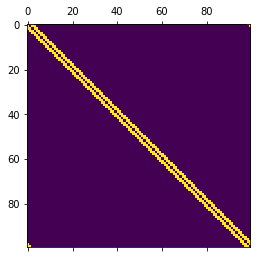

In [7]:
plt.matshow(np.real(ham.mat.todense()))

In [12]:
2**16

65536